In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [2]:
#import Files

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

#Caricamenot BX
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento Stubs 
nStubsLS133 = stubs_awk_LS133.nStubs
nStubsLS263 = stubs_awk_LS263.nStubs
nStubsLS264 = stubs_awk_LS264.nStubs
nStubsLS306 = stubs_awk_LS306.nStubs

# Filling Scheme 

Prima viene fatta una analisi con tutti e quattro i set di dati separati; notato che non vi è nessuna correlazione evidente si passa a studiare l'istogramma con tutti i dati disponibili

In [3]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts_LS133 = np.bincount(BX_LS133, weights=nStubsLS133)
bx_stub_counts_LS263 = np.bincount(BX_LS263, weights=nStubsLS263)
bx_stub_counts_LS264 = np.bincount(BX_LS264, weights=nStubsLS264)
bx_stub_counts_LS306 = np.bincount(BX_LS306, weights=nStubsLS306)

bx_stub_counts = ak.Array([bx_stub_counts_LS133, bx_stub_counts_LS263, bx_stub_counts_LS264, bx_stub_counts_LS306])

### Con tutti e quattro i file assime:

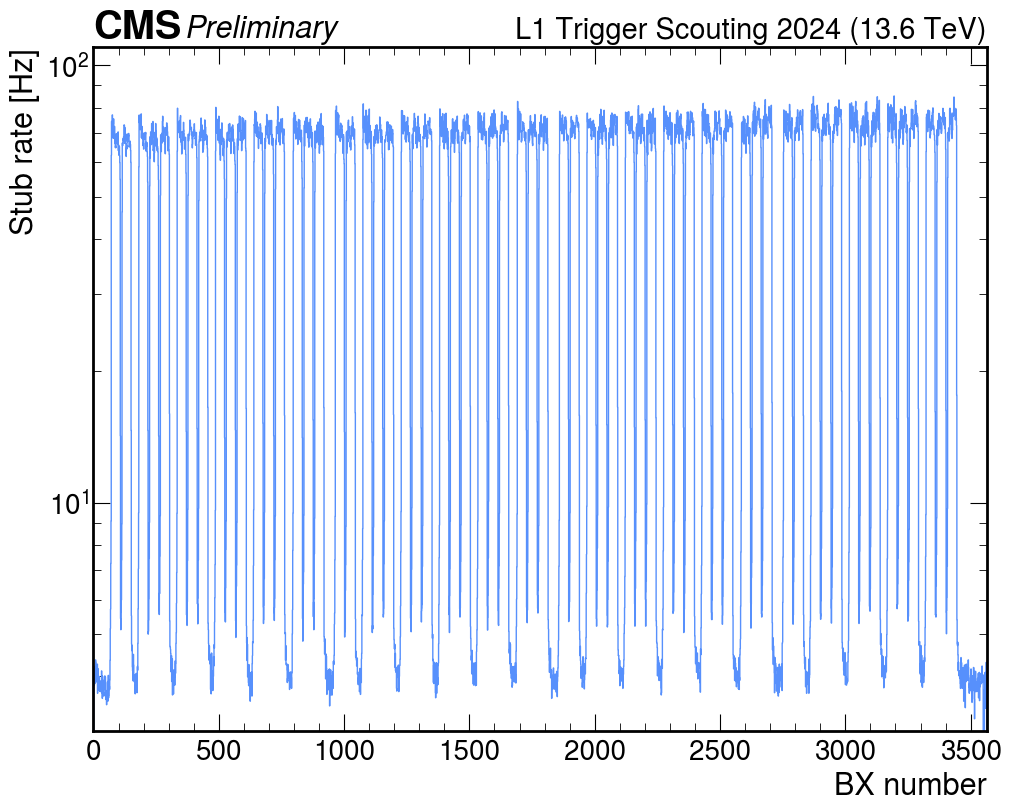

In [4]:
#Mettendo tutti i 4 set di dati indipendenti assieme:

bx_stub_counts_tot = (bx_stub_counts_LS133 + bx_stub_counts_LS263 + bx_stub_counts_LS264 + bx_stub_counts_LS306)/4

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts_tot), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_ylim(3, 110)
ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumber.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsBXnumber.png")

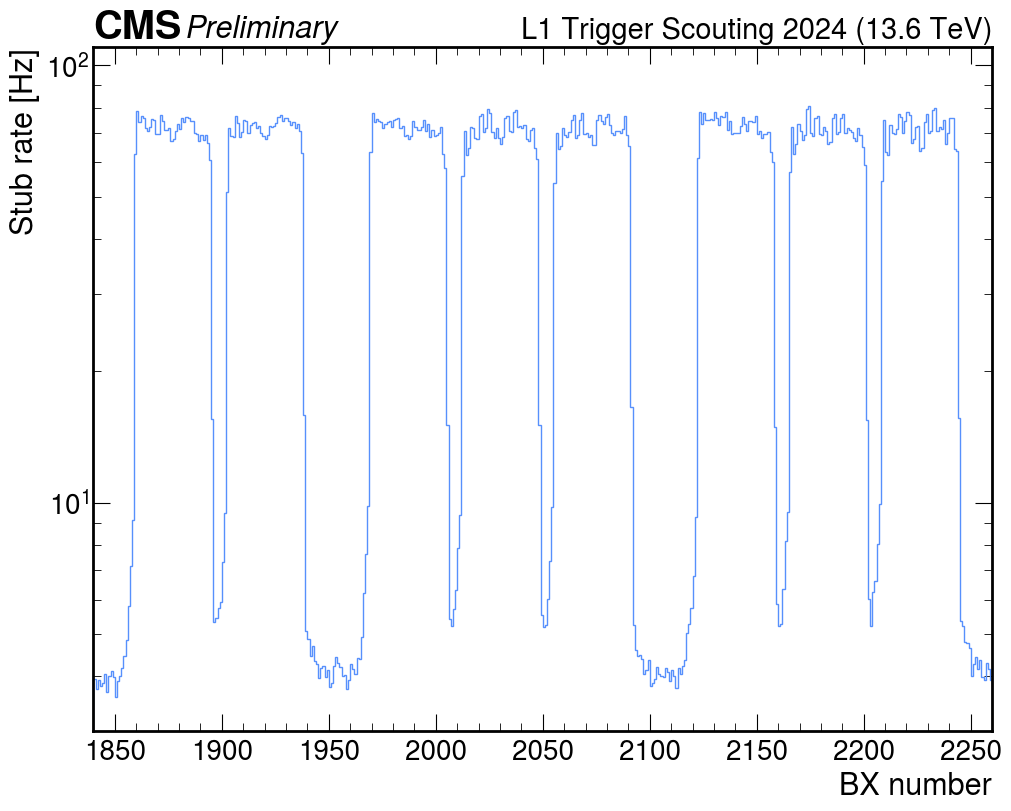

In [5]:
#Zoom in una regione con tutti i dati:

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_stub_counts_tot[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_ylim(3, 110)
ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumberZoom.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsBXnumberZoom.png")

# Grafici Bidimensionali

In [6]:
#------------------------------------------LS133------------------------------------------#
StationLS133  = stubs_awk_LS133.stubStation - 1
SectorLS133   = stubs_awk_LS133.stubSector
WheelLS133    = stubs_awk_LS133.stubWheel + 2

#------------------------------------------LS263------------------------------------------#
StationLS263  = stubs_awk_LS263.stubStation - 1
SectorLS263   = stubs_awk_LS263.stubSector
WheelLS263    = stubs_awk_LS263.stubWheel + 2

#------------------------------------------LS264------------------------------------------#
StationLS264  = stubs_awk_LS264.stubStation - 1
SectorLS264   = stubs_awk_LS264.stubSector
WheelLS264    = stubs_awk_LS264.stubWheel + 2

#------------------------------------------LS306------------------------------------------#
StationLS306  = stubs_awk_LS306.stubStation - 1
SectorLS306   = stubs_awk_LS306.stubSector
WheelLS306    = stubs_awk_LS306.stubWheel + 2



In [7]:
#Il peso è posto ad 1, si potrebbe usare la quality?
WheelAndSectorLS133 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS133), ak.flatten(SectorLS133), 1)
WheelAndSectorLS263 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS263), ak.flatten(SectorLS263), 1)
WheelAndSectorLS264 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS264), ak.flatten(SectorLS264), 1)
WheelAndSectorLS306 = WeightedBiDimHist(5, 12, ak.flatten(WheelLS306), ak.flatten(SectorLS306), 1)

StationAndWheelLS133 = WeightedBiDimHist(4, 5, ak.flatten(StationLS133), ak.flatten(WheelLS133), 1)
StationAndWheelLS263 = WeightedBiDimHist(4, 5, ak.flatten(StationLS263), ak.flatten(WheelLS263), 1)
StationAndWheelLS264 = WeightedBiDimHist(4, 5, ak.flatten(StationLS264), ak.flatten(WheelLS264), 1)
StationAndWheelLS306 = WeightedBiDimHist(4, 5, ak.flatten(StationLS306), ak.flatten(WheelLS306), 1)

In [8]:
WheelAndSector = ConvertToKHz(WheelAndSectorLS133 + WheelAndSectorLS263 + WheelAndSectorLS264 + WheelAndSectorLS306)
StationAndWheel = ConvertToKHz(StationAndWheelLS133 + StationAndWheelLS263 + StationAndWheelLS264 + StationAndWheelLS306)

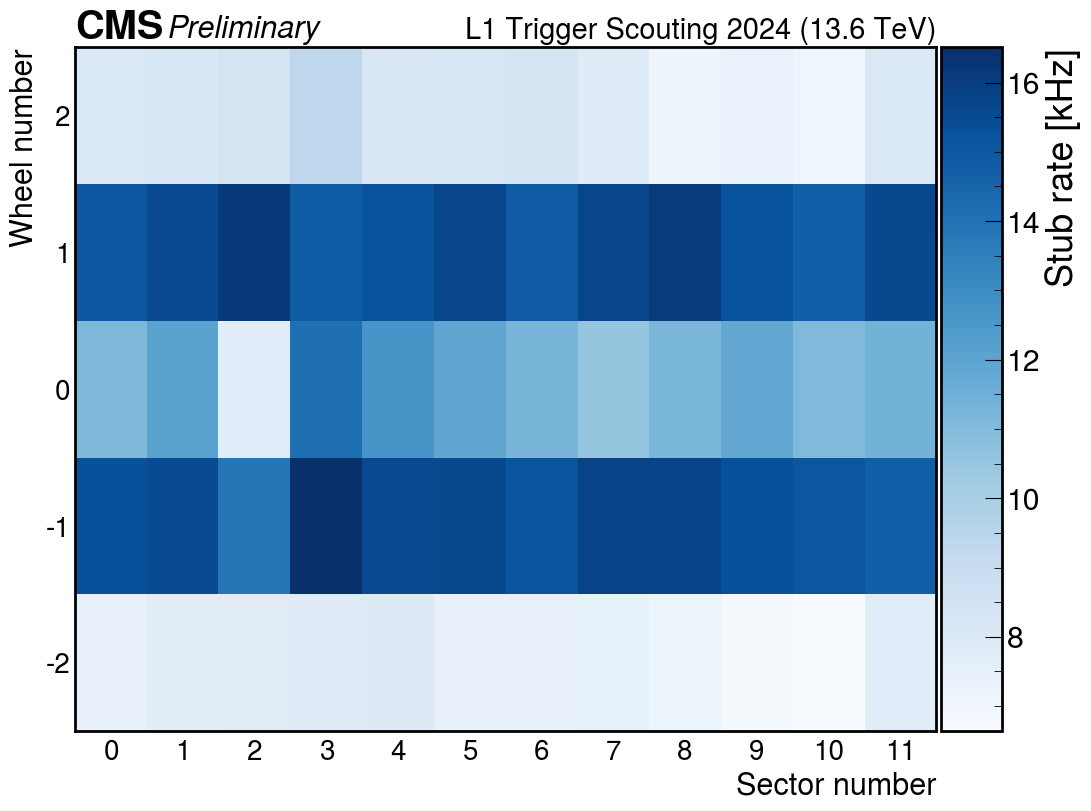

In [9]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)


set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.set_yticks(ticks=np.arange(5), labels=np.arange(-2, 3, 1))
ax.set_xticks(ticks=np.arange(0, 12, 1), labels=np.arange(0, 12, 1))


cax = ax.imshow(WheelAndSector, cmap='Blues', aspect='auto', origin='lower')
divider = make_axes_locatable(ax)
cax2 = divider.append_axes("right", size="7%", pad=0.05) 
plt.colorbar(cax, cax=cax2, label='Stub rate [kHz]', )

ax.set_xlabel('Sector number')
ax.set_ylabel('Wheel number')
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("../Immagini/StubsWheelAndSector.pdf")
#plt.savefig("../Immagini/ImmaginiPNG/StubsWheelAndSector.png")
#plt.show()

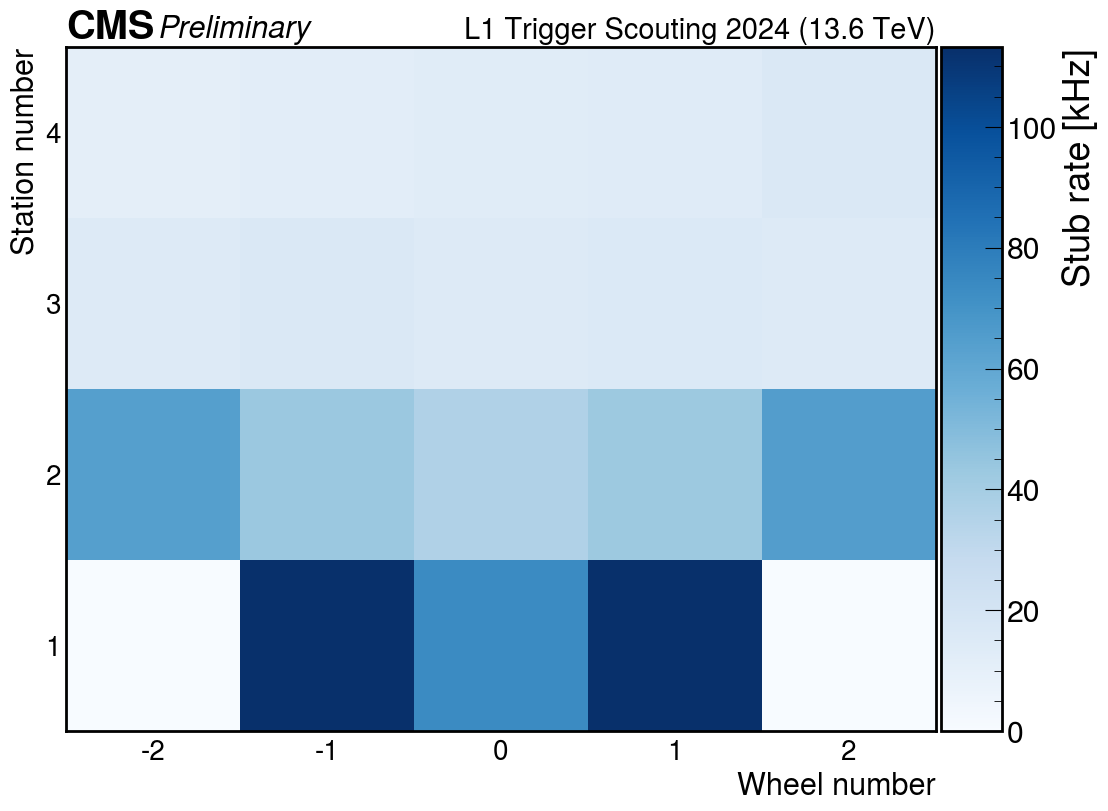

In [10]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

cax = ax.imshow(StationAndWheel, cmap='Blues', aspect='auto', origin='lower')

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.set_yticks(ticks=np.arange(0, 4, 1), labels=np.arange(1, 5, 1))
ax.set_xticks(ticks=np.arange(5), labels=np.arange(-2, 3, 1))

divider = make_axes_locatable(ax)
cax2 = divider.append_axes("right", size="7%", pad=0.05) 
plt.colorbar(cax, cax=cax2, label='Stub rate [kHz]')

ax.set_xlabel('Wheel number')
ax.set_ylabel('Station number')
ax.tick_params(axis='both', which='both', length=0)

plt.savefig("../Immagini/StubsStationandWheel.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsStationandWheel.png")
plt.show()

# Stubs per BX e per Orbit

RICONTROLLA PERCHE' NON PARTE DA ZERO!!

In [11]:
#Bincount di nStubs
nStubsLS133_count = ConvertToHz(np.bincount(nStubsLS133))
nStubsLS263_count = ConvertToHz(np.bincount(nStubsLS263))
nStubsLS264_count = ConvertToHz(np.bincount(nStubsLS264))
nStubsLS306_count = ConvertToHz(np.bincount(nStubsLS306))

nStubs_Array = ak.Array([nStubsLS133_count, nStubsLS263_count, nStubsLS264_count, nStubsLS306_count])

In [12]:
#Somma vettoriale di tutti i counts
MaxStubs = max(len(nStubs_Array[0]), len(nStubs_Array[1]), len(nStubs_Array[2]), len(nStubs_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnStubsLS133 = ak.fill_none(ak.pad_none(nStubs_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS263 = ak.fill_none(ak.pad_none(nStubs_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS264 = ak.fill_none(ak.pad_none(nStubs_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnStubsLS306 = ak.fill_none(ak.pad_none(nStubs_Array[3], MaxStubs, axis = 0, clip=True), 0)

nStubs = FnStubsLS133 + FnStubsLS263 + FnStubsLS264 + FnStubsLS306

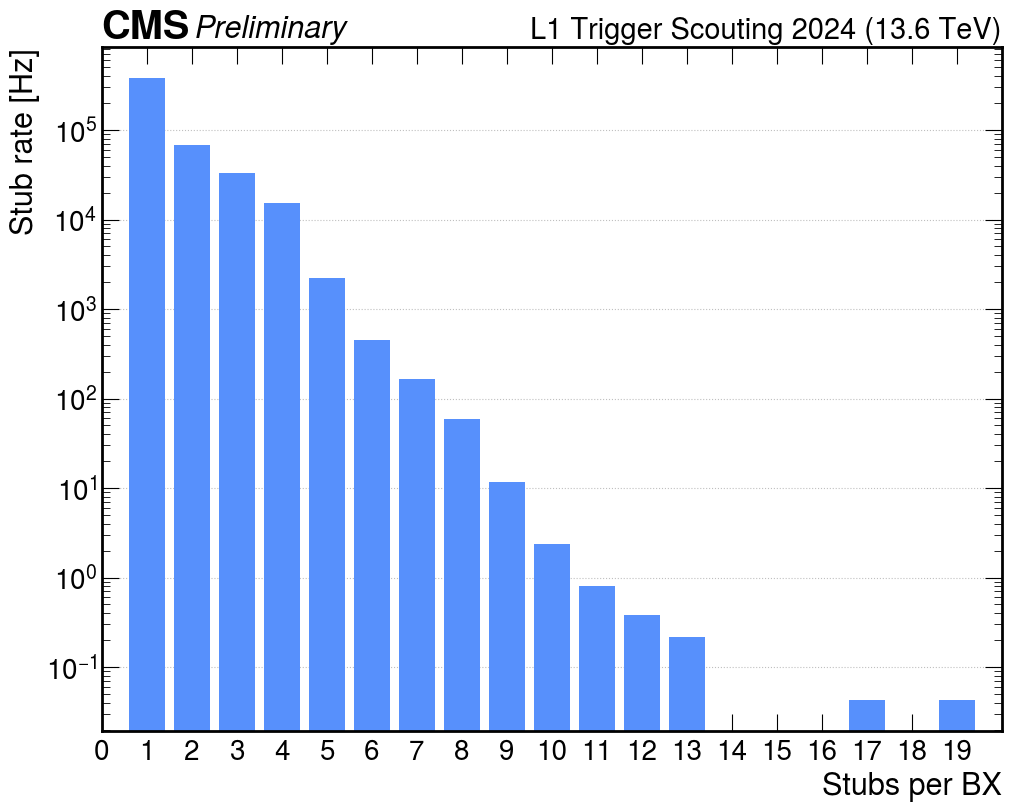

In [13]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nStubs)), nStubs)

ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)

plt.savefig("../Immagini/StubsMolteplicity.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsMolteplicity.png")

In [14]:
#Stubs per orbit, (tempo di compilazione 4 minuti)

'''StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)
StubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)
StubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)
StubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'''
#D'ora in avanti il risultato di questa funzione è immagazzinato e pronto all'uso in "UtilityAndConst.py"

'StubsPerOrbitLS133 = StubsPerOrbit(BX_LS133, nStubsLS133)\nStubsPerOrbitLS263 = StubsPerOrbit(BX_LS263, nStubsLS263)\nStubsPerOrbitLS264 = StubsPerOrbit(BX_LS264, nStubsLS264)\nStubsPerOrbitLS306 = StubsPerOrbit(BX_LS306, nStubsLS306)'

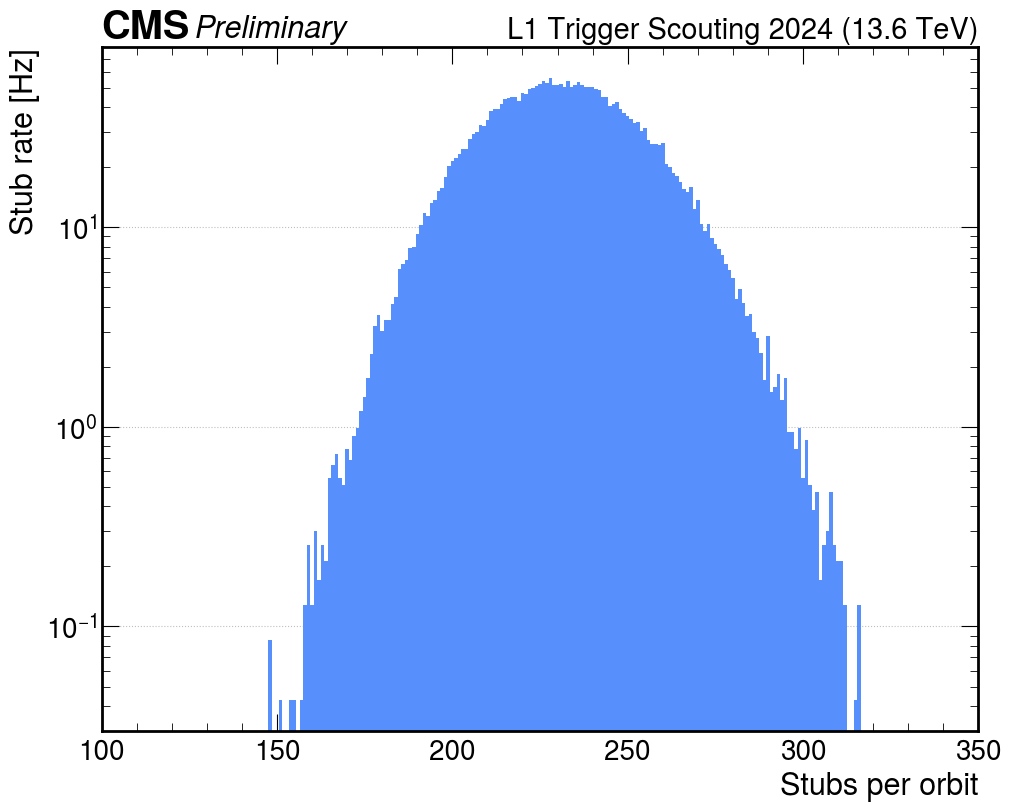

In [15]:
StubsPerOrbit = ConvertToHz(StubsPerOrbitLS133 + StubsPerOrbitLS263 + StubsPerOrbitLS264 + StubsPerOrbitLS306)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bins = np.arange(1, len(StubsPerOrbit) + 1)

StubsPerOrbit_Hist = hist.Hist(hist.axis.Variable(bins, name="Stubs", ))

StubsPerOrbit_Hist.fill(Stubs=StubsPerOrbit)
#hep.histplot(StubsPerOrbit_Hist, label = "Stubs per Orbit", ax=ax, yerr = False, lw = 2)


ax.bar(np.arange(1, len(StubsPerOrbit) + 1), StubsPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor')
ax.set_xlabel('Stubs per orbit')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(100, 350)

ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)


plt.savefig("../Immagini/StubsPerOrbit.pdf")
plt.savefig("../Immagini/ImmaginiPNG/StubsPerOrbit.png")